## Categorising countries

### Data Source

The data used in this task was orginally sourced from Help.NGO. This international non-governmental organisation specialises in emergency response, preparedness, and risk mitigation.  

### Dataset Attributes
- country: name of the country
- child_mort: death of children under 5 years of age per 1000 live births
- exports: exports of goods and services per capita. Given as a percentage of the GDP per capita
- health: total health spending per capita. Given as a percentage of GDP per capita
- imports: imports of goods and services per capita. Given as a percentage of the GDP per capita
- income: net income per person
- inflation: the measurement of the annual growth rate of the Total GDP
- life_expec: the average number of years a new born child would live if the current mortality patterns remain the same
- total_fer: the number of children that would be born to each woman if the current age-fertility rates remains the same
- gdpp: the GDP per capita. Calculated as the Total GDP divided by the total population.

## Objective  
To group countries using socio-economic and health factors to determine the development status of the country.

In [553]:
# Import libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [554]:
# Random state seed
rseed = 42

## Load and explore data

In [555]:
# Import the dataset
data = pd.read_csv('Country-data.csv')


In [556]:
data['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran

In [557]:
data.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [558]:
# Check the shape
data.shape

(167, 10)

The data set shows 167 rows and 10 columns.

In [559]:
# Check datatypes & counts
data.dtypes


country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

The data types shows one categorical column - country - and the rest are numerical

In [560]:
# data_country = data.iloc[:,[0]]


In [561]:
# data_country

In [562]:
data.count()

country       167
child_mort    167
exports       167
health        167
imports       167
income        167
inflation     167
life_expec    167
total_fer     167
gdpp          167
dtype: int64

In [563]:
# Get descriptive statistics
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [564]:
# Identify any missing data
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

The data set has no empty values.

 # Preprocessing and Feature Selection 

In [565]:
# Drop any non-numeric features (columns)
data.drop('country', axis =1, inplace=True)

<Axes: >

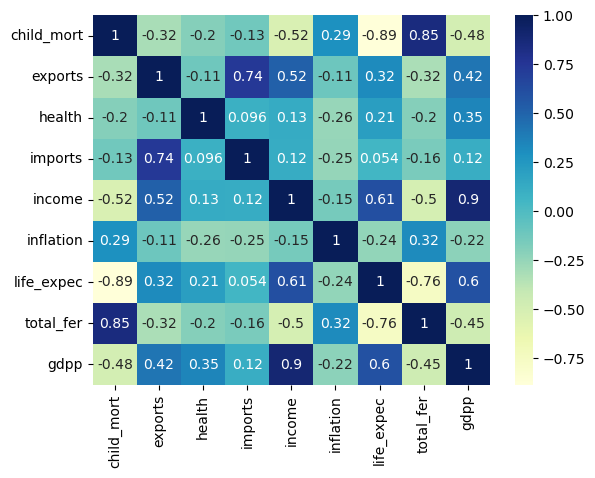

In [566]:
# Create a correlation map of features to explore relationships between features
sns.heatmap(data.corr(), annot = True, cmap = 'YlGnBu')

The strongest correlations are as follows:
The biggest corellation of 85% is between the child_mort: death of children under 5 years of age per 1000 live births and total_fer: the number of children that would be born to each woman if the current age-fertility rates remains the same. 
The same correlation 85% is for the income and gdpp. Slighly less correlated is the life expectancy and the income.

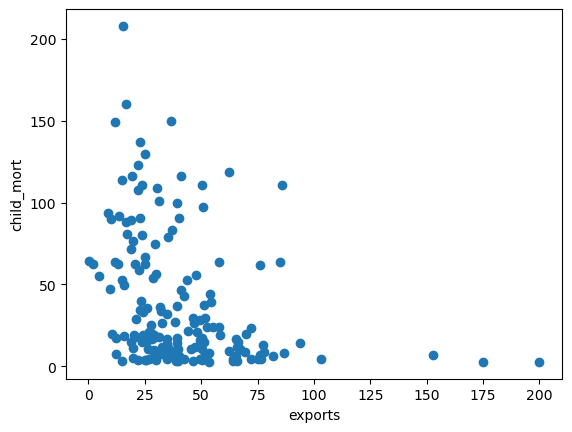

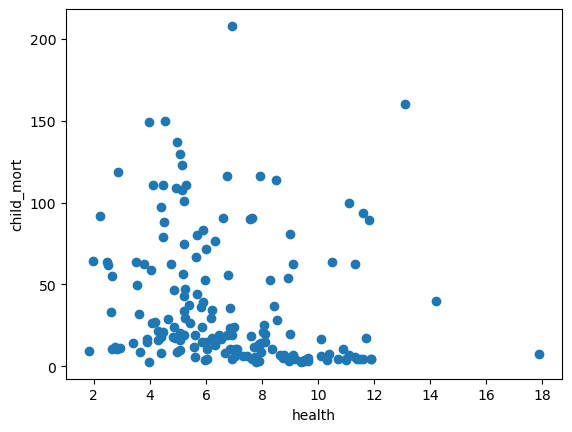

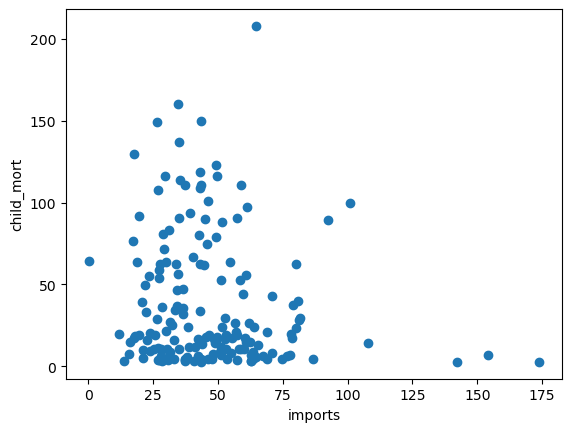

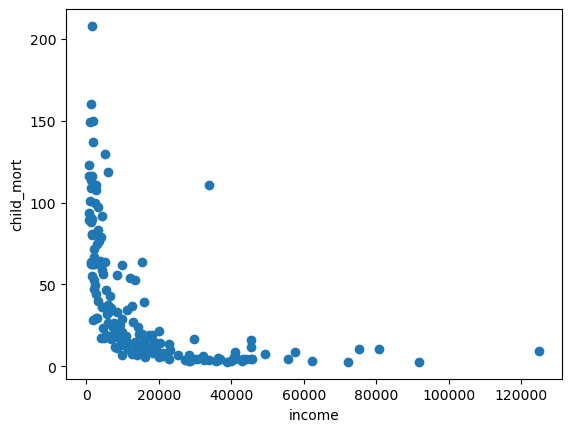

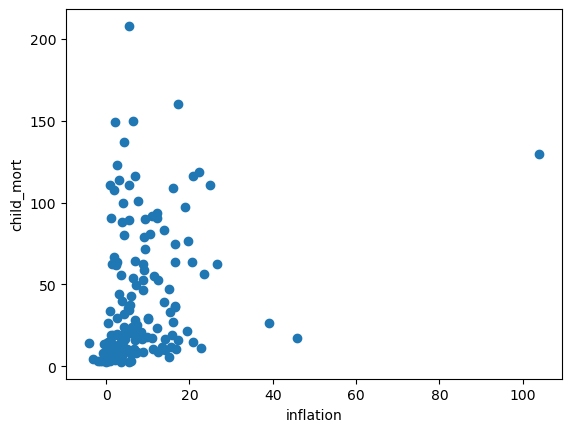

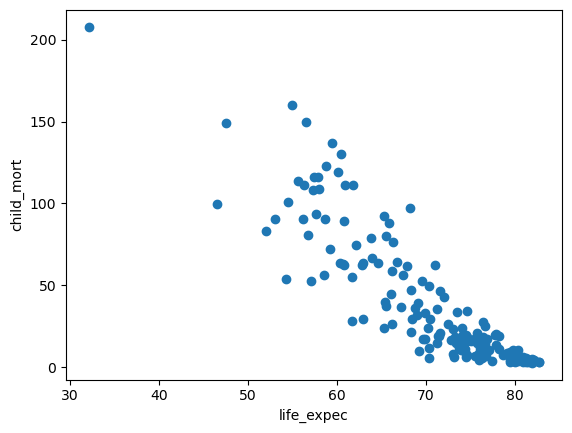

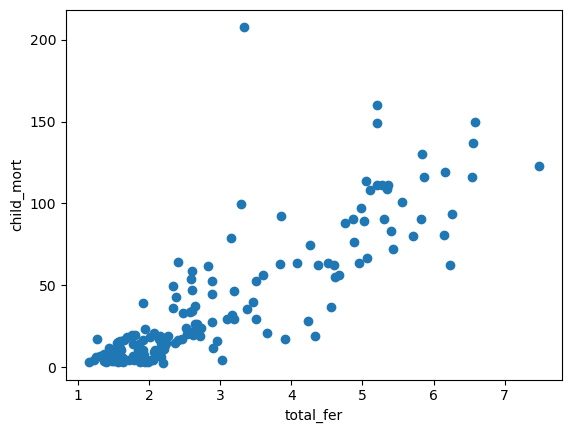

In [567]:
# Explore the continuous independent features against child_mort using scatter plots.
for f in data.columns[1:-1]:
  plt.scatter(data[f], data['child_mort'])
  plt.xlabel(f)
  plt.ylabel('child_mort')
  plt.show()


In the above scatter plots the clusters are not very much defined. The potential clusters can be seen in: total_fer and child_mort and total_fer. child_mort and life_expect, child_mort and health and child_mort and inflation.

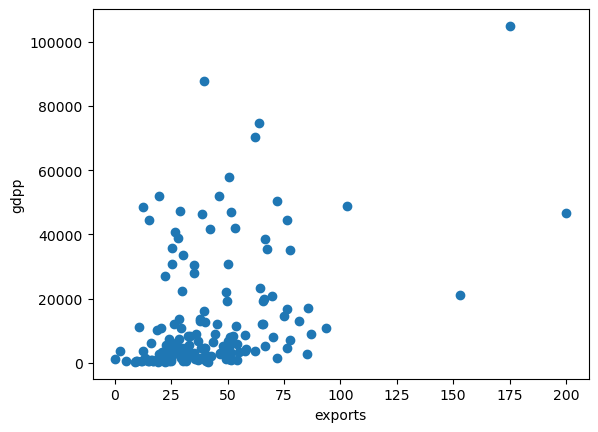

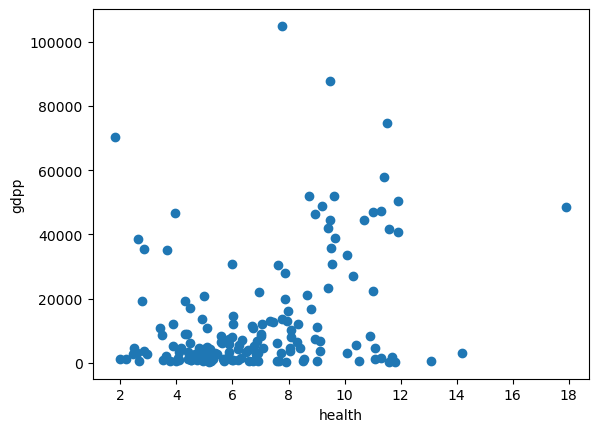

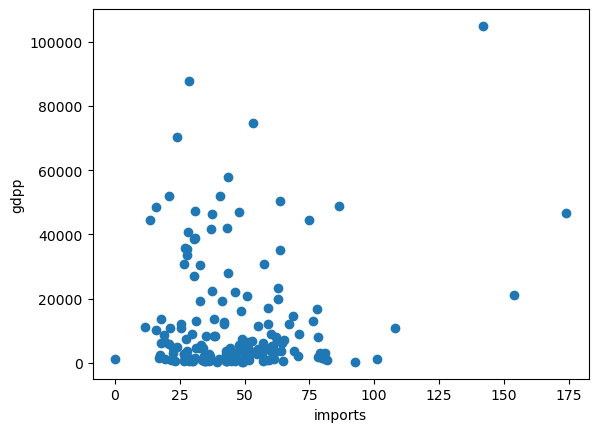

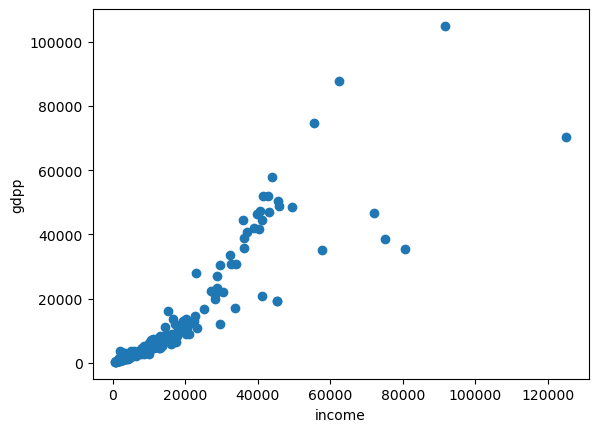

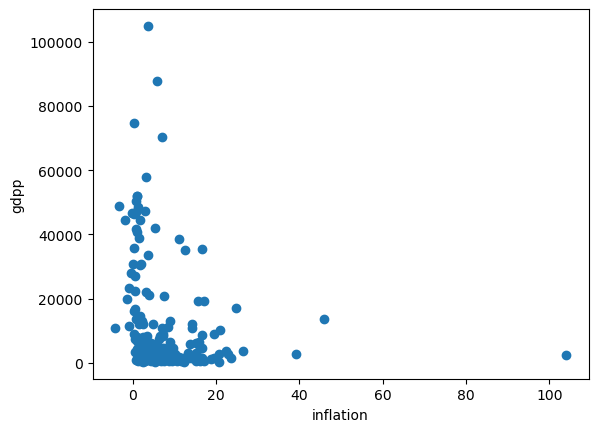

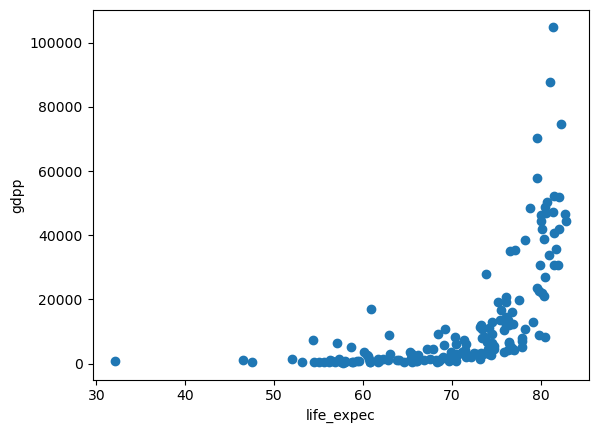

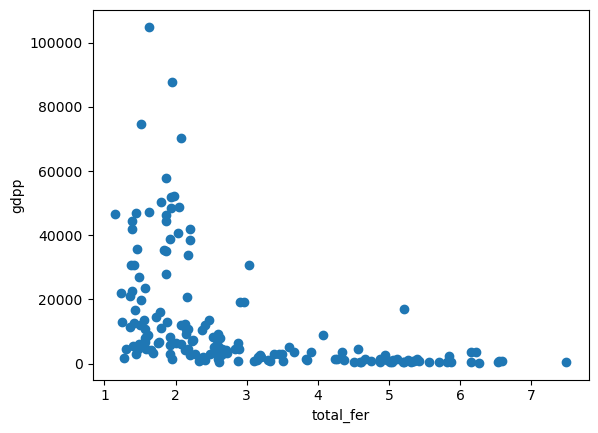

In [568]:
# Explore the continuous independent features against gdpp using scatter plots.
for f in data.columns[1:-1]:
  plt.scatter(data[f], data['gdpp'])
  plt.xlabel(f)
  plt.ylabel('gdpp')
  plt.show()


In the plots above the plots gdpp and income, imports, health and exports contain potential clustered paterns.

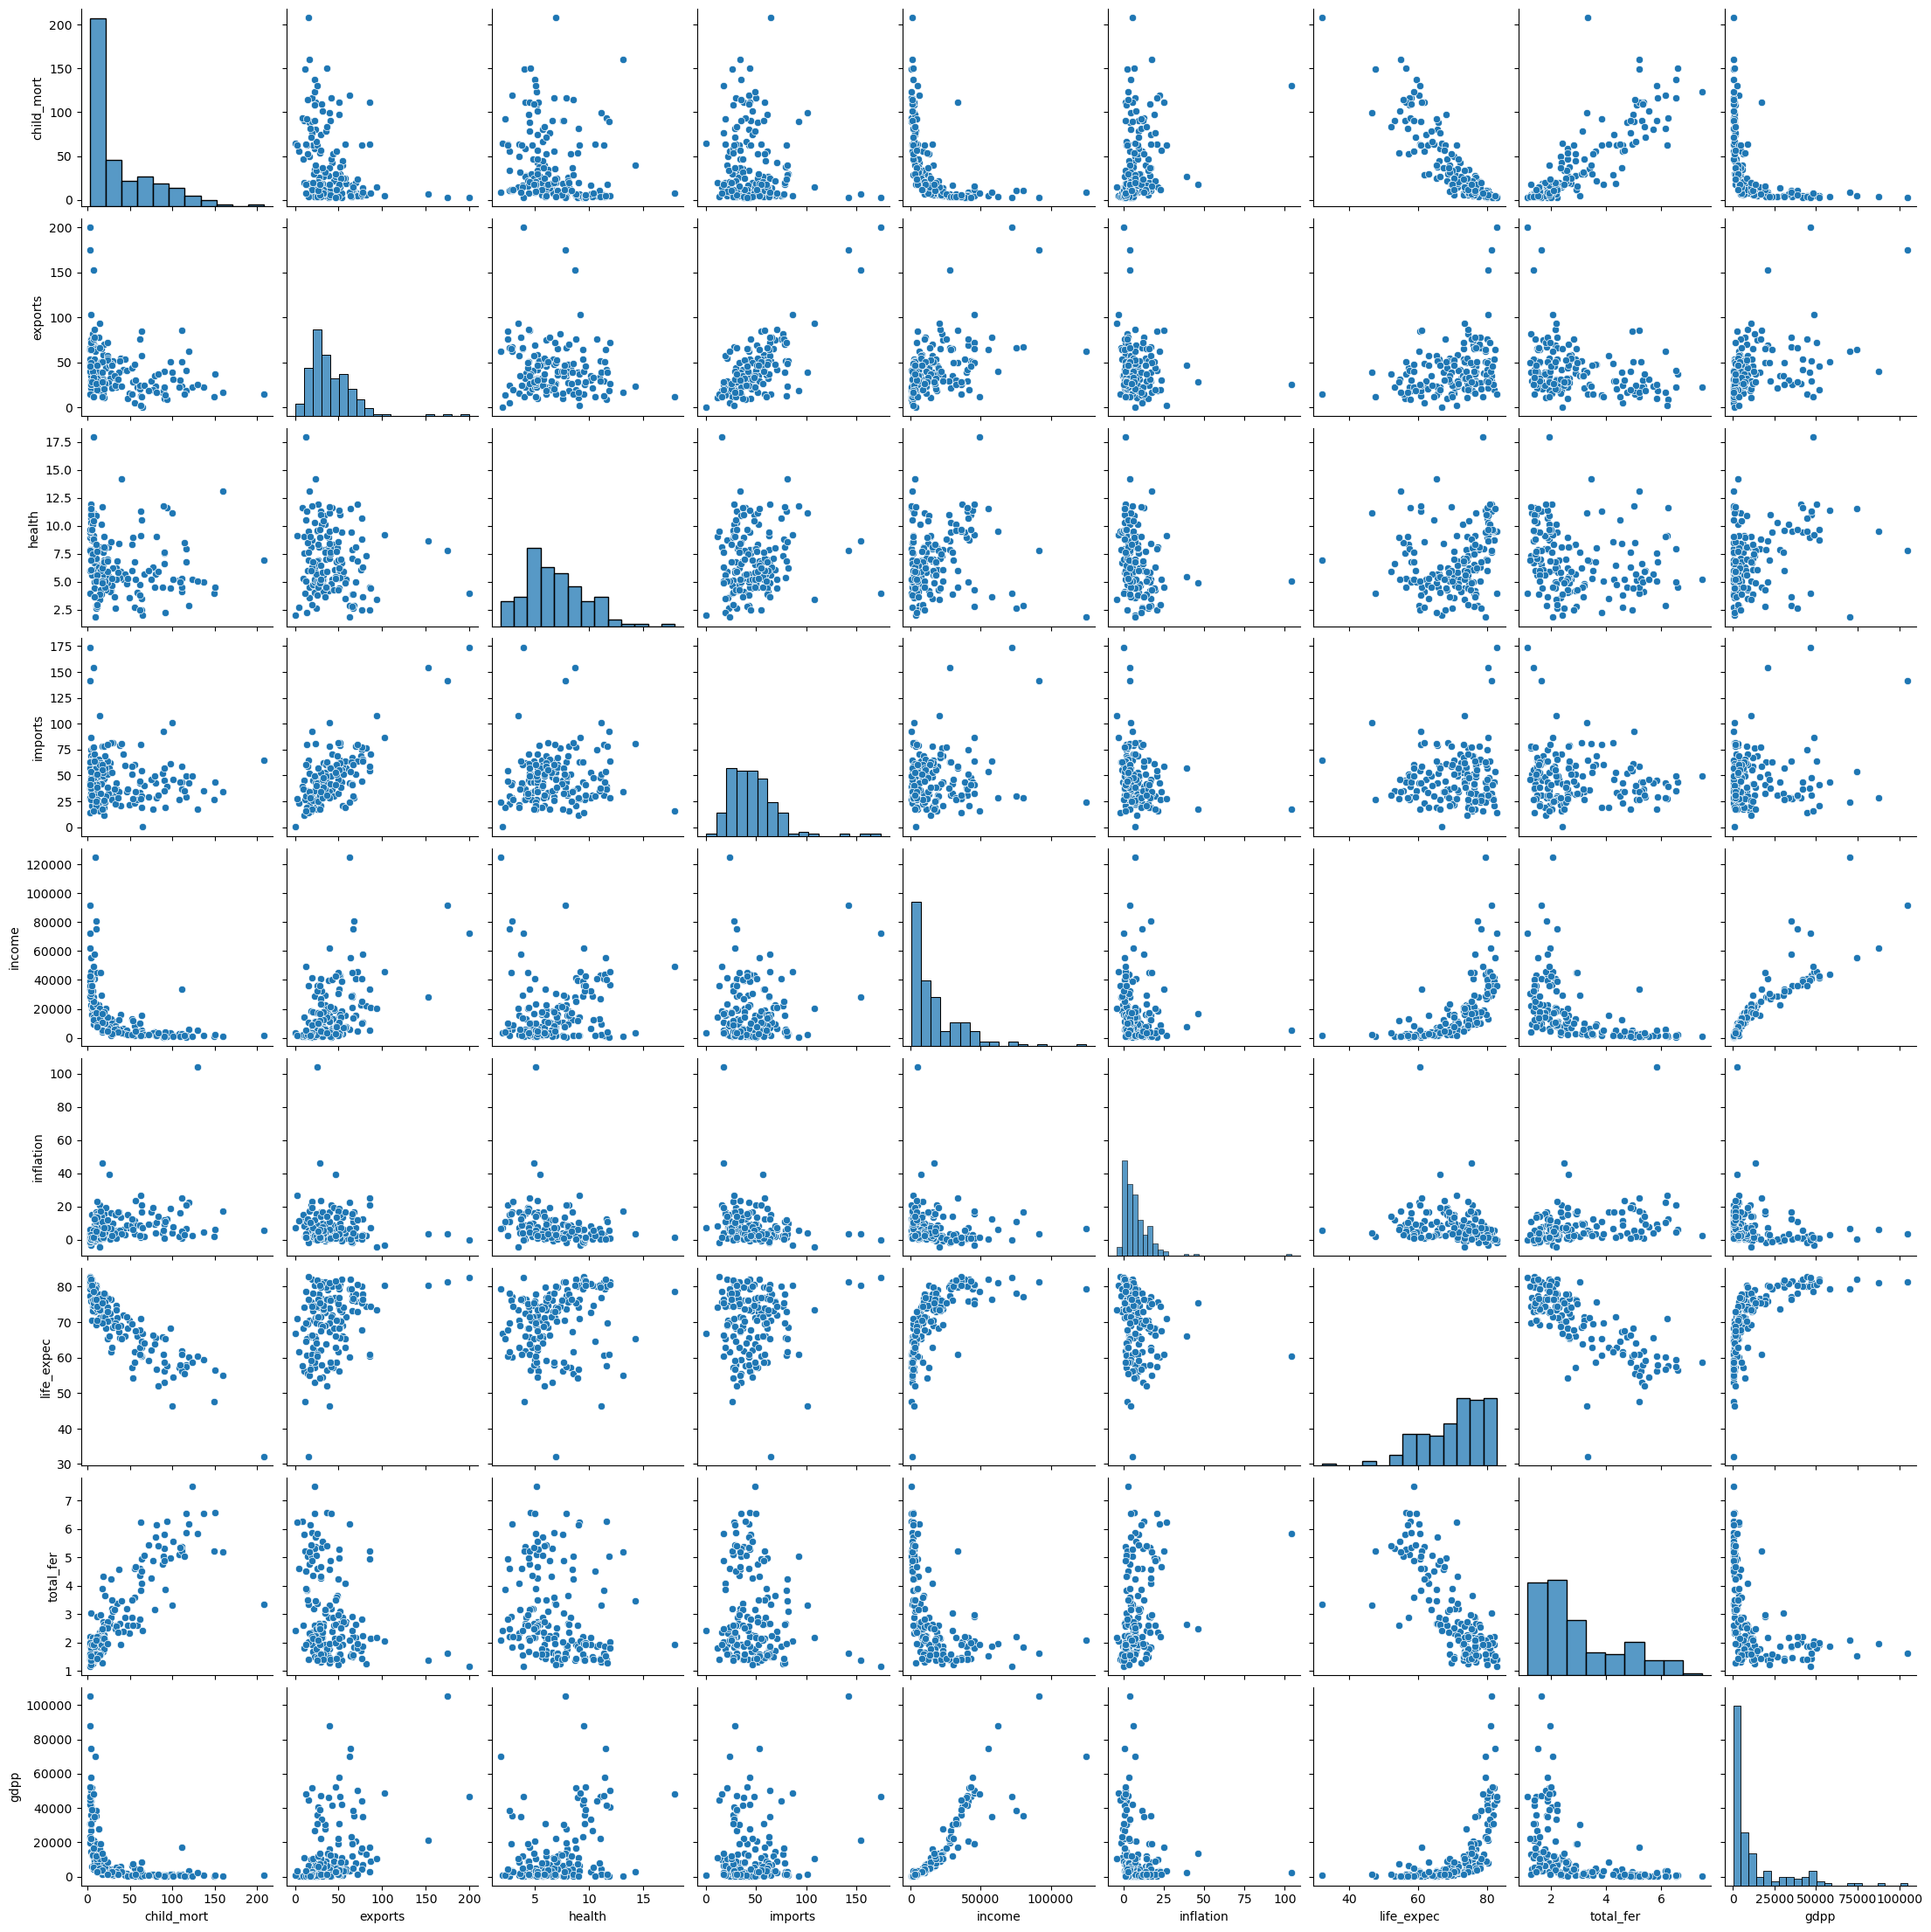

In [569]:
# Create a pair plot
# Hint: Explore seaborn pairplot
sns.pairplot(data)

The diagonal plots shows that majority of the plots are overlapping for example gdpp with income, total fertility and child mortality, inflation and income.

### Scaling the Data

In [570]:
# Normalise the data using MinMaxScaler
# Name the normalised dataframe "df_scaled"

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(data)
df_scaled

array([[0.42648491, 0.04948197, 0.35860783, ..., 0.47534517, 0.73659306,
        0.00307343],
       [0.06815969, 0.13953104, 0.29459291, ..., 0.87179487, 0.07886435,
        0.03683341],
       [0.12025316, 0.1915594 , 0.14667495, ..., 0.87573964, 0.27444795,
        0.04036499],
       ...,
       [0.10077897, 0.35965101, 0.31261653, ..., 0.8086785 , 0.12618297,
        0.01029885],
       [0.26144109, 0.1495365 , 0.20944686, ..., 0.69822485, 0.55520505,
        0.01029885],
       [0.39191821, 0.18455558, 0.25357365, ..., 0.39250493, 0.670347  ,
        0.01173057]])

In [571]:
X = df_scaled

## K-Means Clustering

### Selecting K

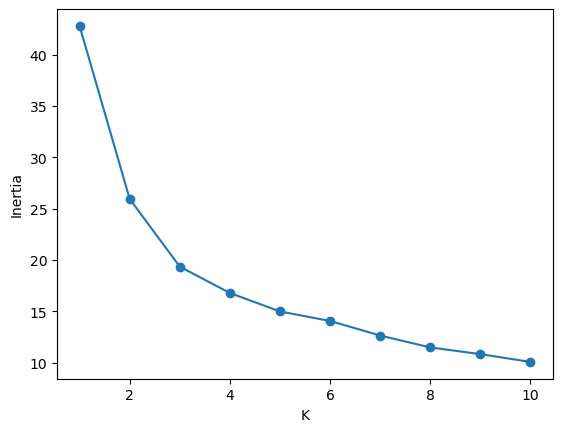

In [572]:
# Plot elbow curve
def eval_Kmeans(X, k, r):
    kmeans = KMeans(n_clusters=k, random_state=r, max_iter=500)
    kmeans.fit(df_scaled)
    return kmeans.inertia_

def elbow_Kmeans(X, max_k=10, r=42):
    within_cluster_vars = [eval_Kmeans(X, k, r) for k in range(1, max_k+1)]
    plt.plot(range(1, 11), within_cluster_vars,marker='o')
    plt.xlabel('K')
    plt.ylabel('Inertia')
    plt.show()

    # Plot elbow curve using scaled dataset
elbow_Kmeans(df_scaled)

The elbow runs between the K = 2 to K =4 approximately 

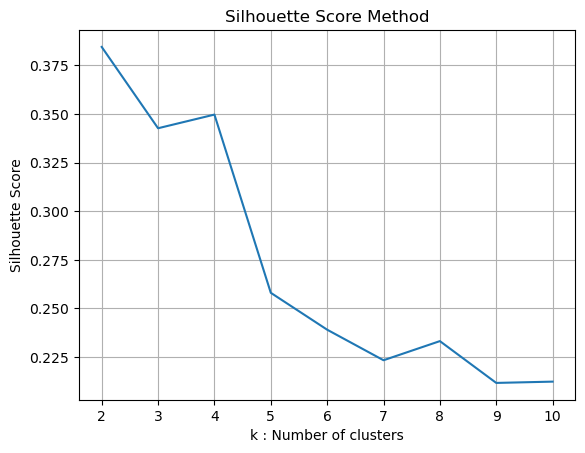

In [573]:
# Silhouette score method
kmax = 10
sil = []
plt.plot()
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k, random_state=rseed, max_iter=500)
    kmeans.fit(df_scaled)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_scaled, labels, metric='euclidean'))

sns.lineplot(x=range(2, kmax+1), y=sil)
plt.title('Silhouette Score Method')
plt.xlabel('k : Number of clusters')
plt.ylabel("Silhouette Score")
plt.grid(visible=True)
plt.show()

The silhouette method shows that the value of K = 2

## Fitting a K-Means Model with the selected K value

In [574]:
kmeans = KMeans(n_clusters = 3, random_state = rseed)
kmeans.fit(df_scaled)

KMeans(n_clusters=3, random_state=42)

In [592]:
# Turn data back into a DataFrame
df_scaled = pd.DataFrame(data)
df_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [576]:
# Check model performance with the silhouette coefficient
score = silhouette_score(df_scaled, kmeans.labels_)
score

0.2508547150006692

## Predictions

In [577]:
# Add the predicted cluster label column to the original dataframe
df_scaled['Cluster'] = kmeans.labels_
df_scaled


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


In [578]:
# Find the number of observations in each class
df_scaled['Cluster'].value_counts()

Cluster
1    87
0    46
2    34
Name: count, dtype: int64

The above cluster count shows how many observations there are per class. Significant majority of the observations are assigned to class 1.

## Visualisation of clusters

In [579]:
# create variable for the child_mort column.
df_childmort = df_scaled['child_mort']
df_childmort.head()

0     90.2
1     16.6
2     27.3
3    119.0
4     10.3
Name: child_mort, dtype: float64

In [580]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
X = df_scaled
y_pred = kmeans.fit_predict(X)


In [581]:
# Cluster centers
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans = kmeans.fit(df_scaled[['gdpp','child_mort']])
kmeans.cluster_centers_

array([[5.36775000e+03, 4.58169118e+01],
       [4.06407407e+04, 5.20370370e+00],
       [8.44250000e+04, 4.87500000e+00]])

<Axes: xlabel='child_mort', ylabel='gdpp'>

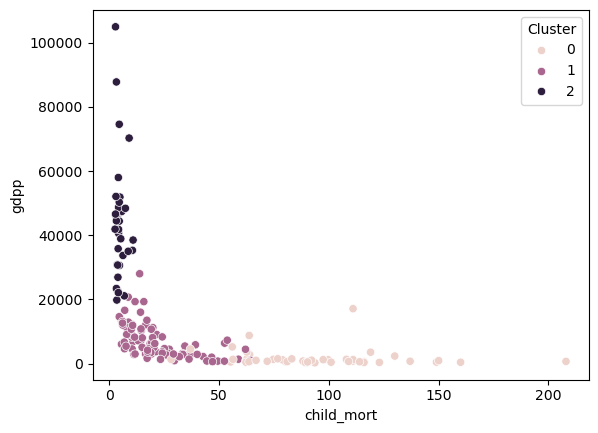

In [582]:
# Visualisation of clusters: child mortality vs gdpp
sns.scatterplot(x ='child_mort', y = 'gdpp', hue = 'Cluster', data = df_scaled)

In [583]:
# Calculating the cluster centers
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans = kmeans.fit(df_scaled[['gdpp', 'inflation']])
kmeans.cluster_centers_

array([[5.36775000e+03, 8.95530882e+00],
       [8.44250000e+04, 4.21675000e+00],
       [4.06407407e+04, 2.39914815e+00]])

<Axes: xlabel='inflation', ylabel='gdpp'>

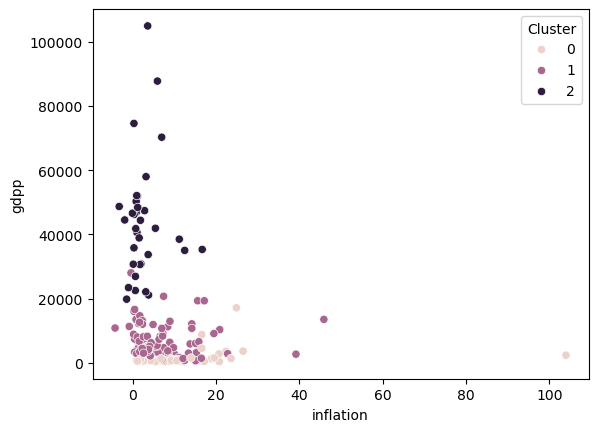

In [584]:
# Visualisation of clusters: child mortality vs gdpp
sns.scatterplot(x ='inflation', y = 'gdpp', hue = 'Cluster', data = df_scaled)

## Conclusions

Label the groups of countries in the plots you created based on child mortality, GDPP and inflation. You may use [terms](https://en.wikipedia.org/wiki/Developing_country#Terms_used_to_classify_countries) such as: least developed, developing and developed, or low, low-middle, upper-middle and high income. Alternatively, simply rank them from highest to lowest. Justify the labels you assign to each group.


**Answer here:**
The clusters were graded by: Least developed, developing and developed in accordance to the cluster layout on the plots. Cluster 2 shows the highest scores for gdpp and the lowest for the inflation and child mortality. Cluster 0 has the lowest scores in gdpp and highest in inflation and child mortality.

In [585]:
# # Give each cluster a name
cluster_names = {
    0: 'Least Developed',
    1: 'Developing',
    2: 'Developed',
}

# # Map the cluster names to the 'Cluster' column
df_scaled['Cluster'] = df_scaled['Cluster'].map(cluster_names)


In [586]:
# Cluster characteristics 

df_scaled
df_scaled.groupby('Cluster').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Cluster,,,,,,,,,
Developed,4.835294,57.905882,8.921176,50.735294,46408.823529,2.595294,80.385294,1.750294,43897.058824
Developing,22.248276,40.795276,6.245172,47.286964,12913.678161,7.527138,72.616092,2.283333,6833.356322
Least Developed,93.284783,29.287174,6.338478,43.297826,3516.804348,12.097065,59.393478,5.090217,1695.913043


In [587]:
df_scaled.head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,Least Developed
1,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,Developing
2,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,Developing
3,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,Least Developed
4,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,Developing
5,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,Developing
6,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,Developing
7,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,Developed
8,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,Developed
9,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,Developing


<Axes: xlabel='child_mort', ylabel='gdpp'>

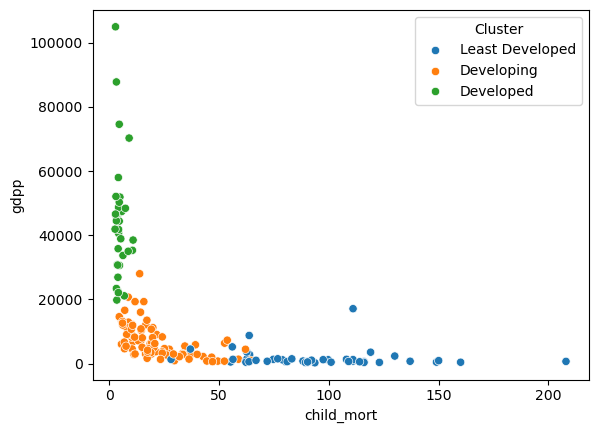

In [588]:
# Plot the clusters with the new labels
sns.scatterplot(x ='child_mort', y = 'gdpp', hue = 'Cluster', data = df_scaled)

In the child mortality vs gdpp plot we can clearly see the division between the cluster and their grading. The least developed countries have extremely low gdpp and high child mortlaity. The developing countries cluster positions between the least developed and the developed countries and the developed countries have a very minimal child mortality and quite high gdpp score

<Axes: xlabel='inflation', ylabel='gdpp'>

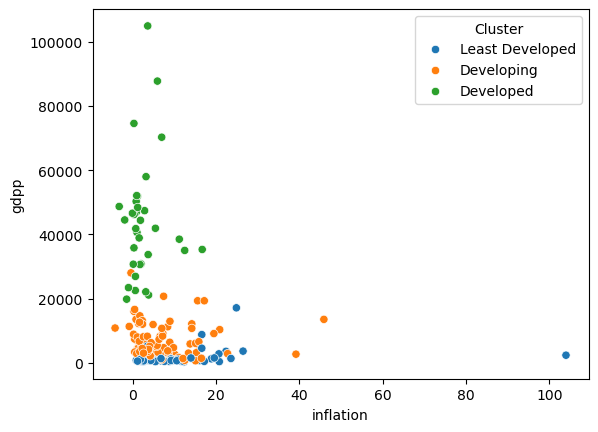

In [589]:
sns.scatterplot(x ='inflation', y = 'gdpp', hue = 'Cluster', data = df_scaled)

In the gdpp vs inflation plot the least developed and developing countries have a similiar score on inlation. However there is a significant difference in the gdpp score between these two clusters. The developing countries have scores above the least developed. The developed coutries cluster is clearly leading with the gdpp scores and maintain low numbers in inflation.

END